### EEG Re-Referencing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fastparquet, pyarrow
import mne
from mne.decoding import Scaler
from mne_features.univariate import compute_pow_freq_bands
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [2]:
from utils import *

In [3]:
mne.set_log_level('WARNING')

In [4]:
df = pd.read_csv('by_patient.csv')

In [5]:
other_df = activity_df(df, 'Other', 'expert_consensus')
seizure_df = activity_df(df, 'Seizure', 'expert_consensus')
gpd_df = activity_df(df, 'GPD', 'expert_consensus')
lpd_df = activity_df(df, 'LPD', 'expert_consensus')
grda_df = activity_df(df, 'GRDA', 'expert_consensus')
lrda_df = activity_df(df, 'LRDA', 'expert_consensus')

In [6]:
activity_df_list = [other_df, seizure_df, gpd_df, lpd_df, grda_df, lrda_df]

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
#reref_df = full_band_df(2000, activity_df_list, 1, None, bandpass = True, reref = True)
#reref_df.to_csv('avg_ref_df.csv', index = None)

In [9]:
X = pd.read_csv('avg_ref_df.csv')
y = get_yvals(2000)['activity']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [10]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
training_yhat = knn.predict(X_train)
testing_yhat = knn.predict(X_test)
print('Training (EEG Re-Referencing)')
print(classification_report(y_train, training_yhat))
print('Testing (EEG Re-Referencing)')
print(classification_report(y_test, testing_yhat))

Training (EEG Re-Referencing)
              precision    recall  f1-score   support

         GPD       0.82      0.93      0.87      1794
        GRDA       0.77      0.89      0.83      1819
         LPD       0.77      0.88      0.82      1800
        LRDA       0.85      0.88      0.86      1795
       Other       0.77      0.61      0.68      1808
     Seizure       0.92      0.68      0.78      1784

    accuracy                           0.81     10800
   macro avg       0.82      0.81      0.81     10800
weighted avg       0.82      0.81      0.81     10800

Testing (EEG Re-Referencing)
              precision    recall  f1-score   support

         GPD       0.78      0.87      0.82       206
        GRDA       0.66      0.80      0.72       181
         LPD       0.66      0.82      0.73       200
        LRDA       0.73      0.81      0.77       205
       Other       0.62      0.41      0.49       192
     Seizure       0.78      0.53      0.63       216

    accuracy      

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
ref_train = accuracy_score(y_train, training_yhat).round(decimals = 3)
ref_test = accuracy_score(y_test, testing_yhat).round(decimals = 3)

In [13]:
ref_train, ref_test

(0.81, 0.707)

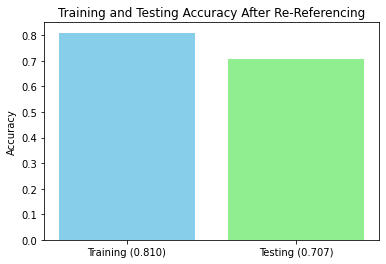

In [15]:
reref_scores = [0.810, 0.707]
datasets = ['Training (0.810)', 'Testing (0.707)']

plt.bar(datasets, reref_scores, color = ['skyblue', 'lightgreen'])
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy After Re-Referencing')
plt.show()